<a href="https://colab.research.google.com/github/sushi404/GoogleColab/blob/main/csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install japanize-matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 38.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=6943eb404115d91193e3fcd6e8f1d098b6a3dd678db0d387bcbcee9d0c5ddc94
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


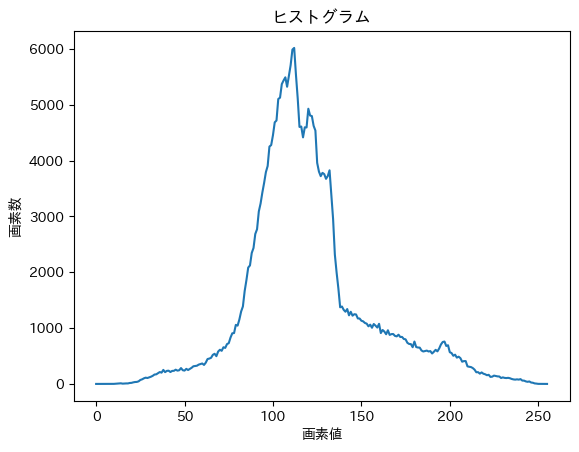

最小値: 0
最大値: 6019
中央値: 580.5
最頻値: 0
画素数: 512
平均値: 33840.0
分散: 2528344.93


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import csv

plt.rcParams['font.family'] = 'IPAexGothic'  # 使用するフォント名に合わせて変更してください

# CSVファイルの読み込み
data = pd.read_csv("hist.csv")  # ファイルパスは適宜変更してください
fname = 'hist.csv'

# 横軸と縦軸のデータを取得
x = data["x"]  # 横軸
y = data["y"]  # 縦軸

# グラフの作成
plt.plot(x, y)

# グラフのタイトルと軸ラベルの設定
plt.title("ヒストグラム")
plt.xlabel("画素値")
plt.ylabel("画素数")

# グラフの表示
plt.show()

values = y

#中央値の計算
sorted_data = sorted(y)
n = len(sorted_data)

if n%2==1: #データが奇数のとき 中央の要素を求める
  median = sorted_data[n//2]
else: #データが偶数のとき 中央の2つの要素の平均を求める
  median = (sorted_data[n // 2 - 1] + sorted_data[n // 2]) / 2

# 最小値の計算
minimum = np.min(values)

# 最頻値の計算
mode = values.mode()[0]  # 最頻値が複数ある場合、一番初めの値を取得します

# 最大値の計算
maximum = np.max(values)

# 結果の表示
print("最小値:", minimum)
print("最大値:", maximum)
print("中央値:", median)
print("最頻値:", mode)

# 画素数の計算 画像データの縦*横で計算している
pixel_count = data.shape[0] * data.shape[1]

# 結果の表示
print("画素数:", pixel_count)


x_sum = 0
y_sum = 0
count = 0

with open(fname, 'r') as file:
    reader = csv.reader(file)
    next(reader)  # ヘッダー行スキップ
    #合計を求める
    for row in reader:
        x_sum += float(row[0])
        y_sum += float(row[1])
        count += 1

#平均を計算
mean = x_sum+y_sum / count

rounded_mean = round(mean,3)

print("平均値:", rounded_mean)

#分散値を計算
x_mean = x_sum / count
y_mean = y_sum / count

#各データポイントと平均値の差の二乗の総和をデータ数で割る
x_variance = ((data["x"] - x_mean) ** 2).sum() / len(data["x"])  # x列の分散
y_variance = ((data["y"] - y_mean) ** 2).sum() / len(data["y"])  # y列の分散

variance = x_variance + y_variance

rounded_variance = round(variance,3)

print("分散:",rounded_variance)



In [16]:
import numpy as np

R = 110
G = 167
B = 187

#1.単純平均法
mean_Y = R+G+B/3
print("単純平均法:",int(mean_Y))

#2.中間値法
middle_Y = R+B/2
print("中間値法:",int(middle_Y))

#3.中央値法
midian_Y = G
print("中央値法:",int(midian_Y))

#4.NTSC係数による加重平均
NTSC_R =0.299*R
NTSC_G = 0.587*G
NTSC_B = 0.114*B
NTSC_Y = NTSC_R + NTSC_G + NTSC_B
print("NTSC法:",int(NTSC_Y))

#5.Gチャンネル法
Gchannel_Y = G
print("Gチャンネル法:",int(Gchannel_Y))



単純平均法: 339
中間値法: 203
中央値法: 167
NTSC法: 152
Gチャンネル法: 167


In [22]:
import csv
from PIL import Image

# CSVファイルからデータを読み込む
data = []
with open('hist.csv', 'r') as file:
    csv_reader = csv.reader(file)
    next(csv_reader)
    for row in csv_reader:
        data.append(row)

# データを適切な形式に整形する（例：2次元リストをnumpy配列に変換）
import numpy as np
data_array = np.array(data, dtype=np.uint8)

# 画像を生成する
image = Image.fromarray(data_array)

# 画像を保存する
image.save('output.png')

# 画像を表示する
image.show()

# 画像を開く
image = Image.open('output.png')

# 画像の幅と高さを取得
width, height = image.size

# 画素数を計算
pixel_count = width * height

print("画素数:", pixel_count)

画素数: 512
